<h1 style="text-align: center;">&nbsp;<img style="font-size: 0.9em;" src="https://www.hospitalitynet.org/picture/153007157/travelers-push-tripadvisor-past-1-billion-reviews-opinions.jpg?t=1587981992" alt="" width="300" height="100" /><span style="font-family: tahoma, arial, helvetica, sans-serif; font-size: large;"><span style="font-size: x-large;">     Analyse exploratoire des données (EDA)</span></span><span style="font-family: tahoma, arial, helvetica, sans-serif; font-size: large;">&nbsp; &nbsp; &nbsp;&nbsp;</span>&nbsp;<img src="https://i0.wp.com/mosefparis1.fr/wp-content/uploads/2022/10/cropped-image-1.png?fit=532%2C540&amp;ssl=1" alt="" width="150" height="150" />&nbsp;</h1>
<p style="text-align: center;">&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;de Lucie Gabagnou et Yanis Rehoune</p>

### Installation de l'environnement

In [1]:
import os
os.getcwd()

current_path=os.path.dirname(os.getcwd())
os.chdir(current_path)
print("Current path",os.getcwd())

Current path /Users/luciegabagnou/Documents/MOSEF/PYTHON/projet_trip_advisor/sentiment_analysis_tripadvisor


Dans un premier temps, on peut regarder les distributions des variables. Les variables sont quasiment toutes catégorielles, on propose de regarder les effectifs des catégories.

In [2]:
!pip install -r requirements.txt

In [3]:
from collections import Counter
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer


import plotly.express as px
import plotly.graph_objs as go
import plotly.express as px

from scripts.viz.graph import plot_top_ngrams,plot_wordcloud,generate_wordcloud,histogram_plot,plot_sentiment_ratings,wordclouds_by_theme,map_plot_cat
from scripts.ml.features import reviews_cleaner,polarity
from scripts.ml.model import prepare_for_ml,train_and_evaluate_models
from scripts.utils import flatten,counter

In [4]:
clean_data=pd.read_json("data/clean_data.json")

In [5]:
clean_data.head(10)

average_note                                           location  \
0           4.0           39 Avenue de l'Opéra, 75002 Paris France   
1           5.0                    54 rue Piat, 75020 Paris France   
2           4.0  Avenue des 4 Chemins, 92330 Sceaux, 92330 Pari...   
3           4.5                    4 rue Affre, 75018 Paris France   
4           4.0            40 rue Saint Honore, 75001 Paris France   
5           4.5              3 rue de Budapest, 75009 Paris France   
6           4.5    110 boulevard de Courcelles, 75017 Paris France   
7           4.0              51 rue Guy Moquet, 75017 Paris France   
8           5.0  36 Rue de la Montagne Sainte Geneviève, 75005 ...   
9           0.0   8 avenue de Choisy, Bonneuil, 94380 Paris France   

                         name  number_reviews  ranking  \
0                      Bar E7               3    12392   
1          God Bless Broccoli              29     4346   
2              Sushi Robinson               2    12314   
3                    Chez Mai               3    10965   
4       Restaurant le Moliere             152     2142   
5                   Sushi Sun              17     1166   
6       Le Diplomate Paris 17              93     1642   
7                   Le Festiv             103     3454   
8               La Demoiselle              45       90   
9  Presto Pizza / La Victoria               0        0   

                                             reviews  \
0  [Bons cocktails et tapas-cuisine imparfaite:Un...   
1  [Déjeuner:Nous avons manger des très bonne piz...   
2  [Meilleur sushi du coin:En préambule j'ai touj...   
3  [Super spot pour des plats africains de qualit...   
4  [Une brasserie classique:Très bon accueil du p...   
5  [Le top !:Il n y a pas beaucoup de note, certa...   
6  [Adresse à retenir:Cuisine raffinée, carte qui...   
7  [Repas amis:Bonsoir,\nLa cuisine est bonne,\nL...   
8  [Un petit endroit de Paris qu’il ne faut pas r...   
9                                                 []   

                                                 url     price  \
0  https://www.tripadvisor.fr/Restaurant_Review-g...        []   
1  https://www.tripadvisor.fr/Restaurant_Review-g...  [€€-€€€]   
2  https://www.tripadvisor.fr/Restaurant_Review-g...        []   
3  https://www.tripadvisor.fr/Restaurant_Review-g...        []   
4  https://www.tripadvisor.fr/Restaurant_Review-g...  [€€-€€€]   
5  https://www.tripadvisor.fr/Restaurant_Review-g...       [€]   
6  https://www.tripadvisor.fr/Restaurant_Review-g...  [€€-€€€]   
7  https://www.tripadvisor.fr/Restaurant_Review-g...  [€€-€€€]   
8  https://www.tripadvisor.fr/Restaurant_Review-g...  [€€-€€€]   
9  https://www.tripadvisor.fr/Restaurant_Review-g...        []   

                                            cuisine  longitude   latitude  \
0                                                []   2.333227  48.868499   
1         [Italienne, Pizza, Végétariens bienvenus]   2.383660  48.873115   
2                                                []   2.335660  48.852900   
3                                                []   2.355878  48.885218   
4                           [Française, Européenne]   2.344651  48.861170   
5                     [Japonaise, Sushi, Asiatique]   2.327602  48.876061   
6  [Française, Bar à vins, Brasserie gastronomique]   2.300981  48.878858   
7                                       [Française]   2.324687  48.892514   
8                                      [Bar à vins]   2.348479  48.847932   
9                                                []   2.335660  48.852900   

                                       clean_reviews  \
0  [bon cocktail tapa cuisine imparfait grand cho...   
1  [dejeuner manger bon pizza faire manger super ...   
2  [meilleur sushi coin preambule commande emport...   
3  [super spot plat africain qualite accueil chal...   
4  [brasserie classique bon accueil patron cuisin...   
5  [top beaucoup note certainement nouveau diffic...   
6  [adres

## Analyse globale: étude des features

Dans cette partie, nous allons analyser les variables de notre jeu de données. Finalement, cette exploration sera retrouvée de façon condensée sur l'application. Par conséquent, nous avons voulu faire un code relativement modulaire pour l'utiliser dans l'application.

On récupère l'ensemble des valeurs des variables suivantes. Cela est important pour construire facilement des graphiques de la fréquence d'apparition de certaines modalités, notes, mais aussi pour constituer notre corpus pour l'analyse de texte. 


In [6]:
cuisine_types=flatten(clean_data["cuisine"].values.tolist())
clean_reviews=flatten(clean_data["clean_reviews"].tolist())
ratings=clean_data["average_note"].values.tolist()

#### Type de cuisine

In [7]:
### On stocke les types de cuisine dans une liste puis on compte l'occurence de chacun de ces types dans l'ensemble des restaurants
counter_cuisine_types=counter(cuisine_types)

In [8]:
histogram_plot(x=list(counter_cuisine_types.keys()), y=list(counter_cuisine_types.values()), title='Cuisine Type Counts')

Il y a beaucoup de types de nourriture, mais nous préférons laisser l'ensemble des modalités car elles représentent toutes une idée. Cependant, par la suite, nous nous concentrerons sur les 10/15 premiers types de cuisine car les autres modalités sont très spécifique et peuvent être simplement complémentaires avec un type de cuisine principale (exemple: Pour un restaurant on peut avoir cuisine Francaise, Européenne, Belge, etc..)

#### Ratings

On fait la même chose pour les ratings:

In [9]:
counter_review_rating = counter(ratings)

In [10]:
histogram_plot(x=list(counter_review_rating.keys()), y=list(counter_review_rating.values()), title='Rating Counts')

Les notes semblent être pour la majorité égale 4, donc dans l'ensemble, les notations sont plutôt bonnes. A contrario il y a très peu de notes en dessous de 3 (28).

In [11]:
histogram_plot(x=clean_data["number_reviews"], title='Number of Reviews Counts')

On remarque que plus de la moitié des restaurants possèdent entre 0 et 49 avis utilisateurs. Sinon, le nombre d'avis est très étalé sur la droite et peut  prendre des valeurs allant jusqu'à 5250

##### Ratings vs Type de cuisine
Quid si on croise l'information de ces deux variables? Est-ce que le type de restaurant a un pouvoir discriminant sur la note? Est ce qu'un restaurant Français est dans l'ensemble plus apprécié que le reste?

In [12]:
data_with_cook_modalities_splitted=clean_data.explode('cuisine')
data_with_cook_modalities_splitted["cuisine"]=data_with_cook_modalities_splitted["cuisine"].fillna(data_with_cook_modalities_splitted["cuisine"].mode()[0])
list_common_cooktype= list(counter_cuisine_types.keys())[:10]

In [13]:
list_common_cooktype

['Française',
 'Européenne',
 'Végétariens bienvenus',
 'Asiatique',
 'Italienne',
 'Bar',
 'Japonaise',
 'Pizza',
 'Méditerranéenne',
 'Café']

In [14]:
cook_data=data_with_cook_modalities_splitted.drop_duplicates(subset=["name"]).query("cuisine == @list_common_cooktype")
histogram_plot(x=cook_data["average_note"],color=cook_data["cuisine"]) 


#### Commentaires

In [15]:
clean_corpus=flatten(clean_data["clean_reviews"].values.tolist())

In [16]:
plot_top_ngrams(clean_corpus,20,(2,2))

In [17]:
plot_top_ngrams(clean_corpus,20,(3,3))

Premiers constats:
- Les termes présents parmis les pairs/trigrammes de mots consécutifs semblent être positifs: bon rapport qualité, passer excellent soirée,etc.. Toutefois, il ne faut pas oublier que le preprocess a enlevé des termes, ce qui peut changer la tournure de la phrase. Typiquement: "Pas mauvais", si le "pas" est enlevé dans le preprocess, alors le review semble négatif. Ainsi, il faudra veiller à ça par la suite.
- Il faut créer une liste stopwords avant de poursuivre l'analyse car on voit que ce sont toujours les mêmes termes qui apparaissent. Cela ne nous permettra pas d'avoir une réelle idée des thématiques qui se dégagent des commentaires.
- Les pairs de mots évoquent déjà les critères des utilisateurs: le prix, le service, le moment (ambiance?), la qualité.


In [18]:
stopwords=["bien","qualite","bon","plat","sympa","restaurer","service","accueil"]

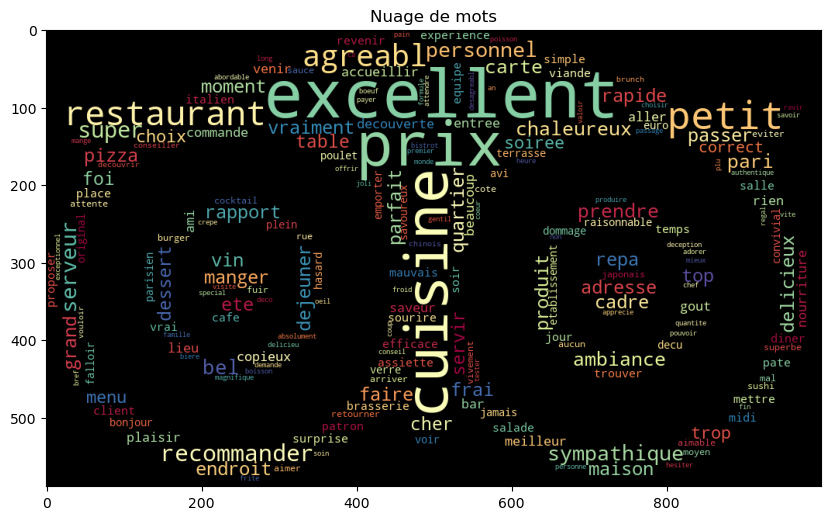

In [19]:
wc=generate_wordcloud(" ".join([elem for elem in clean_corpus]),background_image="TripAdvisor.jpg",background_color="black" ,stopwords=stopwords)
wc_fig,wc_ax=plot_wordcloud(wc)

#### Analyse des commentaires vs d'autres variables

##### Type de cuisine

Quelle est la terminologie employée selon le type de cuisine? Est-ce que les termes sont plus au moins positifs? Est-ce que les commentaires font ressortir des tendances propres à chaque type de cuisine: typiquement, les consommateurs peuvent s'attendre qu'un repas dans un restaurant asiatique soit potentiellement moins cher, donc cela changera leur "dureté" ou leur "gentillesse" à l'égard des restaurants..

In [20]:
data_with_cook_modalities_splitted

average_note                                           location  \
0             4.0           39 Avenue de l'Opéra, 75002 Paris France   
1             5.0                    54 rue Piat, 75020 Paris France   
1             5.0                    54 rue Piat, 75020 Paris France   
1             5.0                    54 rue Piat, 75020 Paris France   
2             4.0  Avenue des 4 Chemins, 92330 Sceaux, 92330 Pari...   
..            ...                                                ...   
997           3.0  1 rue Basse Centre Commercial Forum Des Halles...   
998           4.0                20 Rue D'Artois, 75008 Paris France   
998           4.0                20 Rue D'Artois, 75008 Paris France   
998           4.0                20 Rue D'Artois, 75008 Paris France   
999           4.0                 17 Rue Breguet, 75011 Paris France   

                                         name  number_reviews  ranking  \
0                                      Bar E7               3    12392   
1                          God Bless Broccoli              29     4346   
1                          God Bless Broccoli              29     4346   
1                          God Bless Broccoli              29     4346   
2                              Sushi Robinson               2    12314   
..                                        ...             ...      ...   
997  Brioche Dorée Paris 1er Forum des Halles               5     5996   
998                                   Apicius             278     2776   
998                                   Apicius             278     2776   
998                                   Apicius             278     2776   
999                                     Louve               9    11468   

                                               reviews  \
0    [Bons cocktails et tapas-cuisine imparfaite:Un...   
1    [Déjeuner:Nous avons manger des très bonne piz...   
1    [Déjeuner:Nous avons manger des très bonne piz...   
1    [Déjeuner:Nous avons manger des très bonne piz...   
2    [Meilleur sushi du coin:En préambule j'ai touj...   
..                                                 ...   
997  [Déçues de nos achats au Brioche Dorée du Foru...   
998  [bon mais carte limité:Le restaurant Apicius é...   
998  [bon mais carte limité:Le restaurant Apicius é...   
998  [bon mais carte limité:Le restaurant Apicius é...   
999  [Louve:Musée historique aux longues files, alo...   

                                                   url     price  \
0    https://www.tripadvisor.fr/Restaurant_Review-g...        []   
1    https://www.tripadvisor.fr/Restaurant_Review-g...  [€€-€€€]   
1    https://www.tripadvisor.fr/Restaurant_Review-g...  [€€-€€€]   
1    https://www.tripadvisor.fr/Restaurant_Review-g...  [€€-€€€]   
2    https://www.tripadvisor.fr/Restaurant_Review-g...        []   
..                                                 ...       ...   
997  https://www.tripadvisor.fr/Restaurant_Review-g...        []   
998  https://www.tripadvisor.fr/Restaurant_Review-g...    [€€€€]   
998  https://www.tripadvisor.fr/Restaurant_Review-g...    [€€€€]   
998  https://www.tripadvisor.fr/Restaurant_Review-g...    [€€€€]   
999  https://www.tripadvisor.fr/Restaurant_Review-g...        []   

                   cuisine  longitude   latitude  \
0                Française   2.333227  48.868499   
1                Italienne   2.383660  48.873115   
1                    Pizza   2.383660  48.873115   
1    Végétariens bienvenus   2.383660  48.873115   
2                Française   2.335660  48.852900   
..                     ...        ...        ...   
997    Restauration rapide   2.335660  48.852900   
998              Française   2.307241  48.873339   
998             Européenne   2.307241  48.873339   
998  Végétariens bienvenus   2.307241  48.873339   
999              Française   2.373343  48.857511   

                                         clean_reviews  \
0    [bon cocktail tapa cuisine imparfait grand cho...

Etapes pour réaliser cette analyse (sur les 10 premières composantes):
- Groupby par type de cuisine du texte (on crée un corpus par type  en "join" le texte)
- Création  d'un dataframe des TFIDF*: recense les poids relatifs de chaque mot au sein de chaque type de cuisine par rapport à l'ensemble. Cela permet de mettre en avant les mots propres à un type de cuisine et d'accorder moins d'importance aux termes présents dans tous les types.
- On récupère les 

*TF-IDF (term frequency-inverse document frequency) est un outil utilisé pour mesurer l'importance d'un mot dans un document ou une collection de documents par rapport à une corpus. Il combine deux mesures : la fréquence d'un mot dans un document (TF) et sa fréquence d'apparition dans l'ensemble des documents (IDF). Plus un mot est fréquent dans un document et rare dans l'ensemble des documents, plus son score TF-IDF sera élevé. Cette mesure est souvent utilisée pour l'analyse de textes et l'extraction de termes importants d'un document.

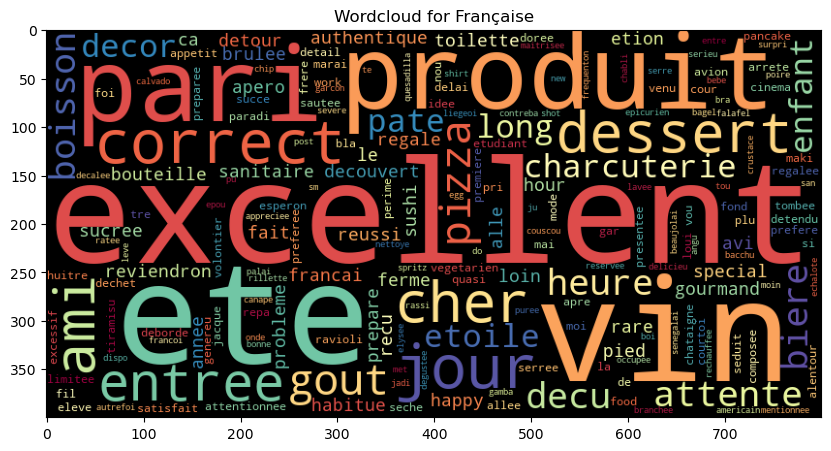

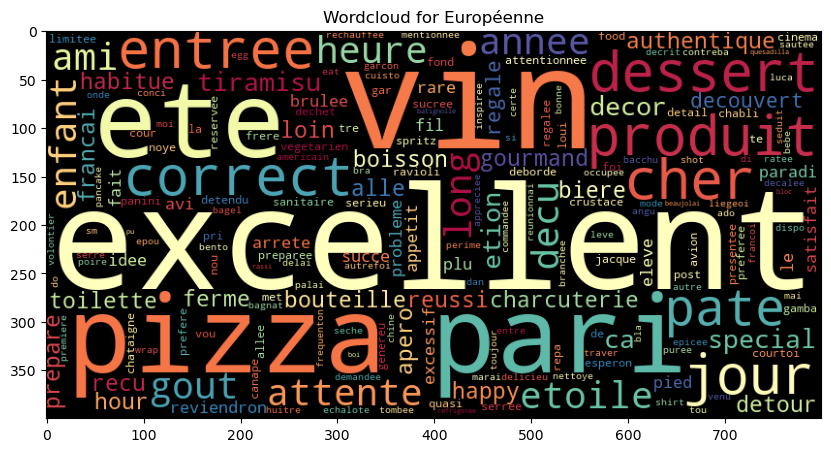

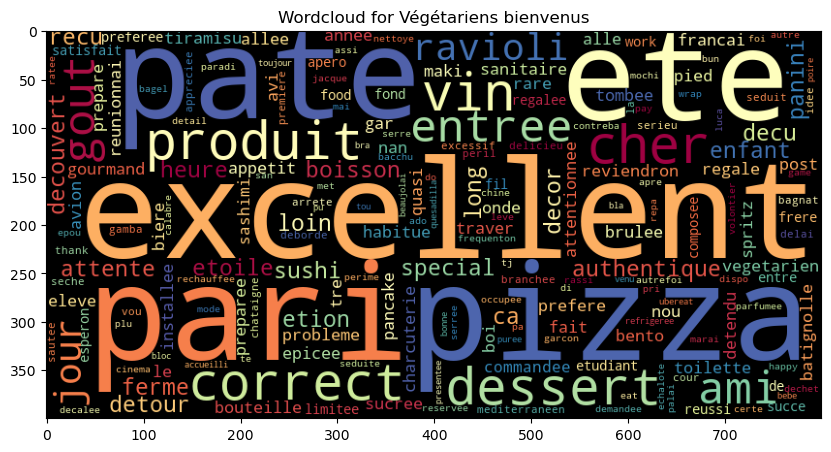

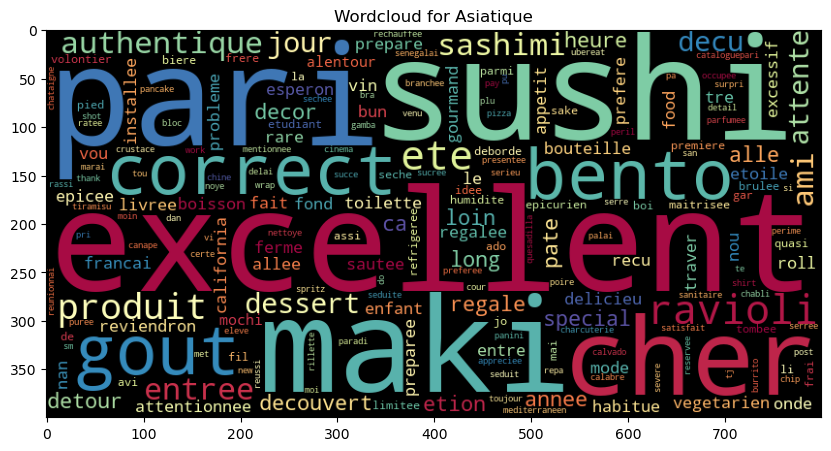

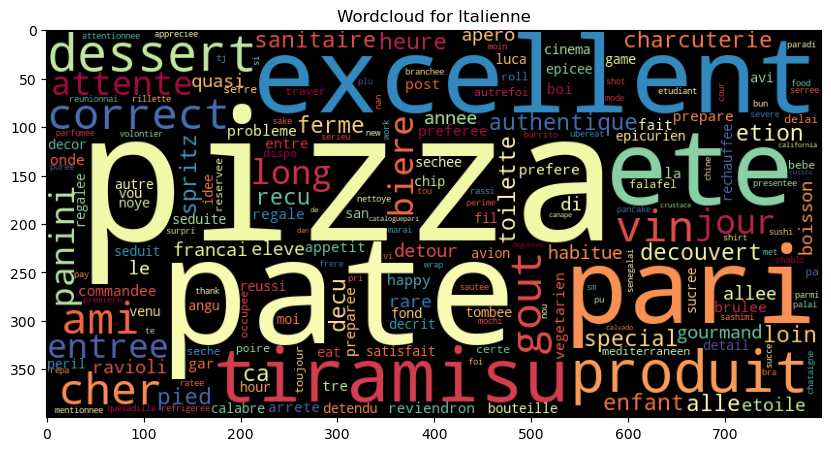

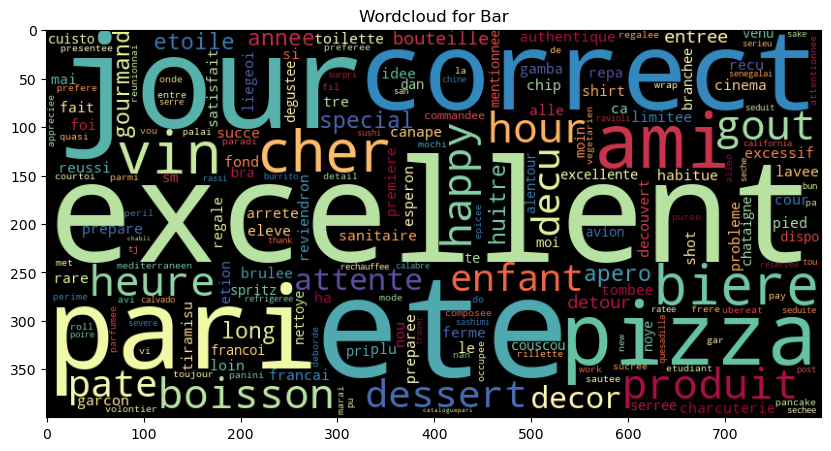

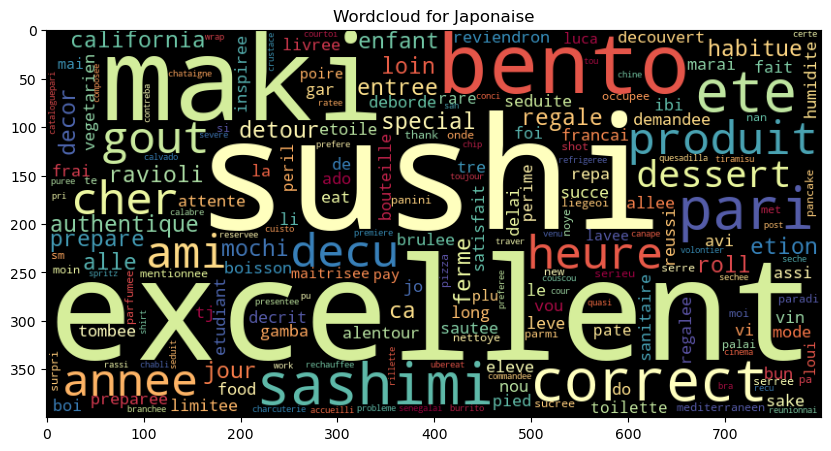

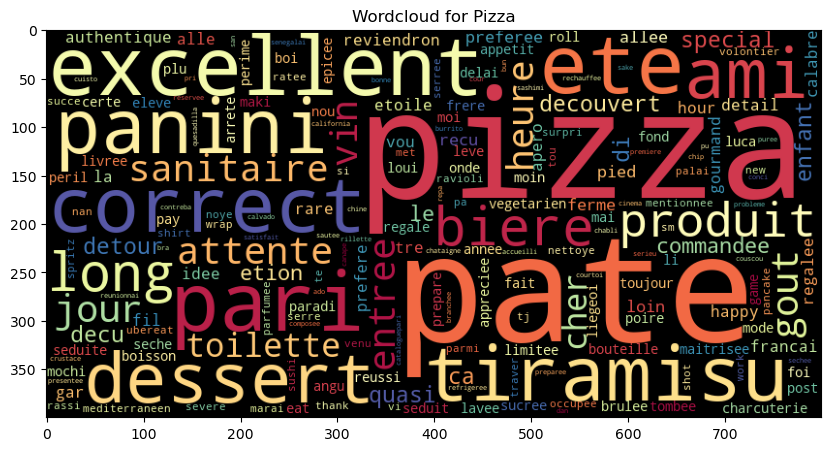

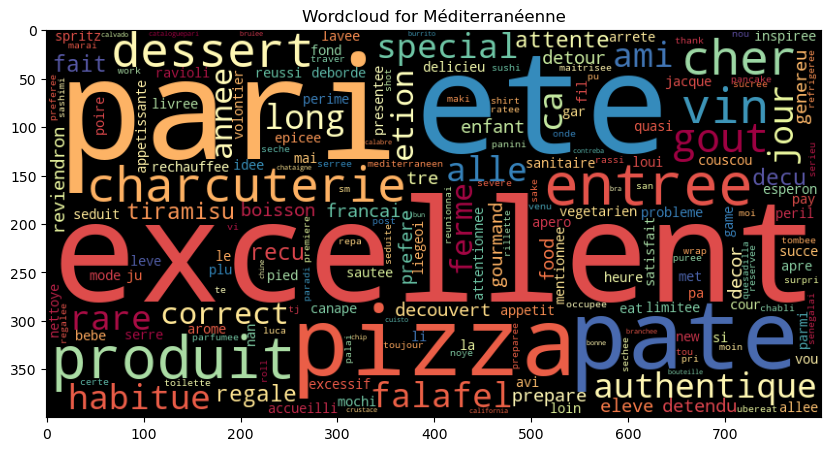

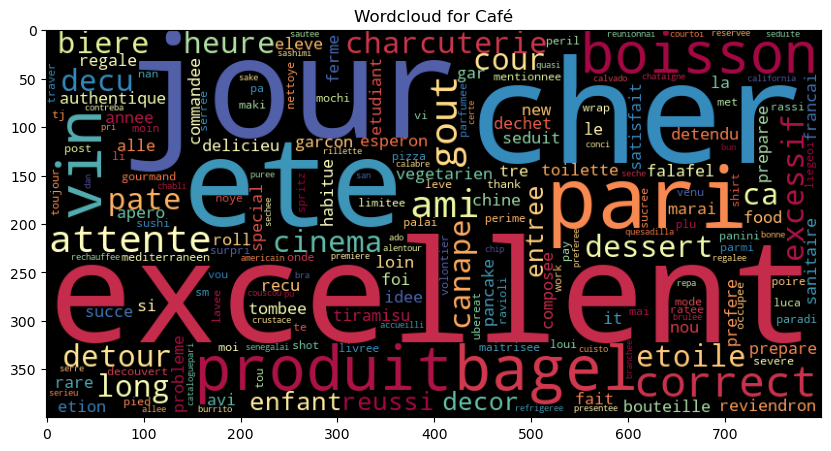

In [21]:
wordclouds_by_theme(data_with_cook_modalities_splitted,theme_col="cuisine",theme_list=list_common_cooktype,filepath="/visuals/wordcloud/",savefig=False,with_title=True)


Au final, ce qui ressort de cette analyse est que ce sont surtout les plats proposés par les restaurants qui discriminent réellement les commentaires: pour la cuisine Française, on voit que le vin et le dessert sont prépondérants, pour la cuisine asiatique/japonaise, on retrouve les sushis, et pareil pour la cuisine italienne avec les pizzas. 
==> Cette discrimination n'est pas pertinente

#### Ratings (note moyenne)

Est ce que le vocabulaire employé est très différent selon les notes moyennes attribuées?

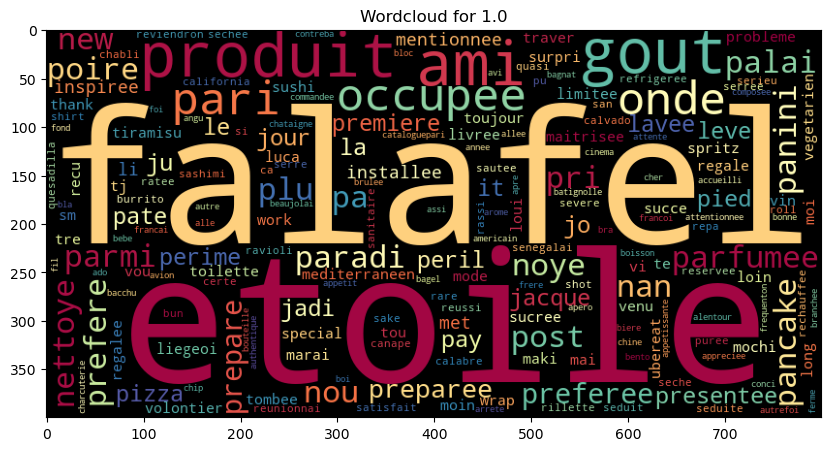

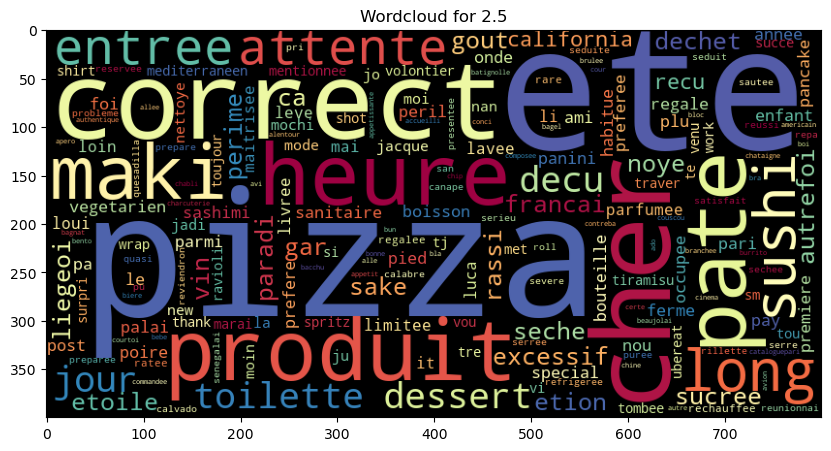

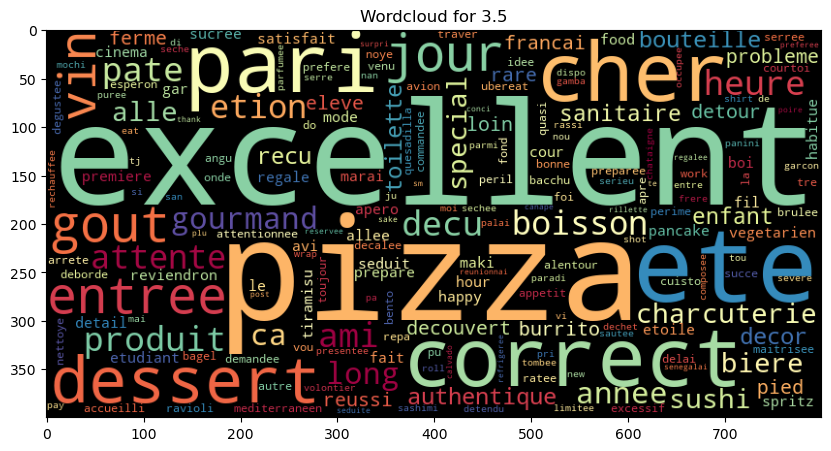

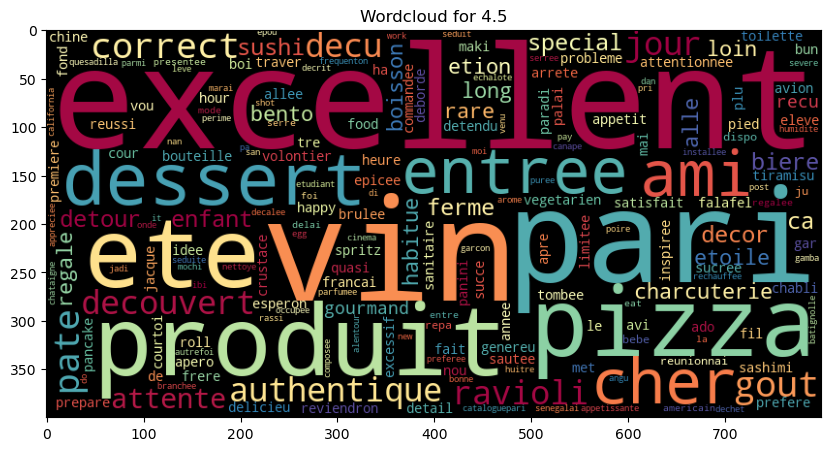

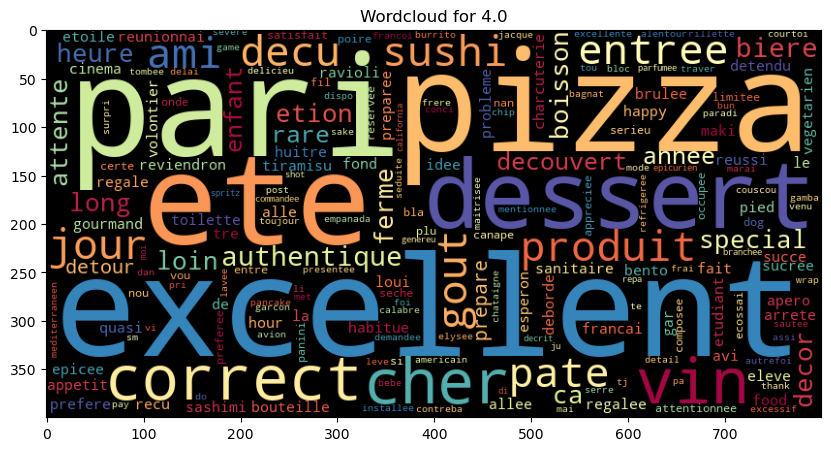

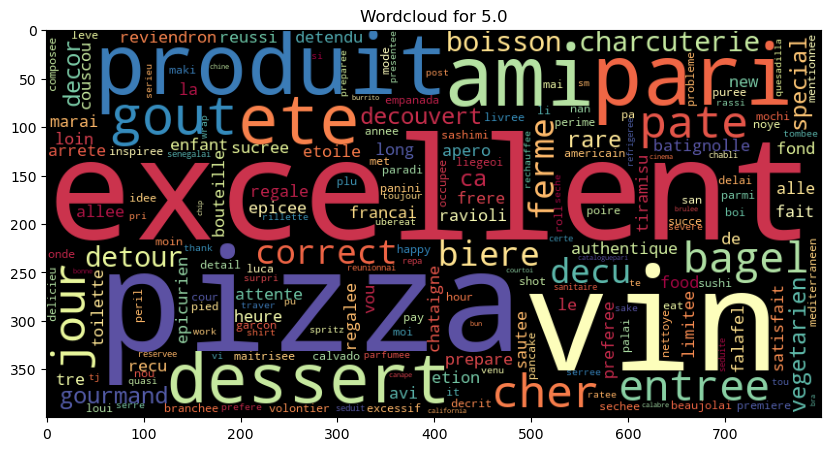

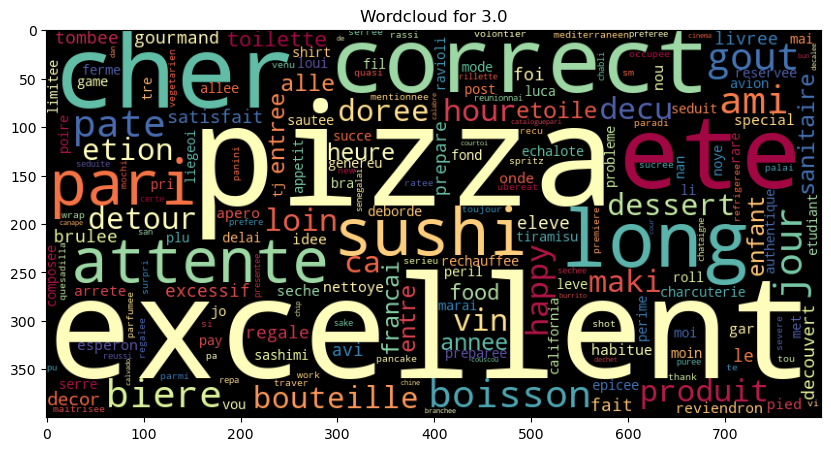

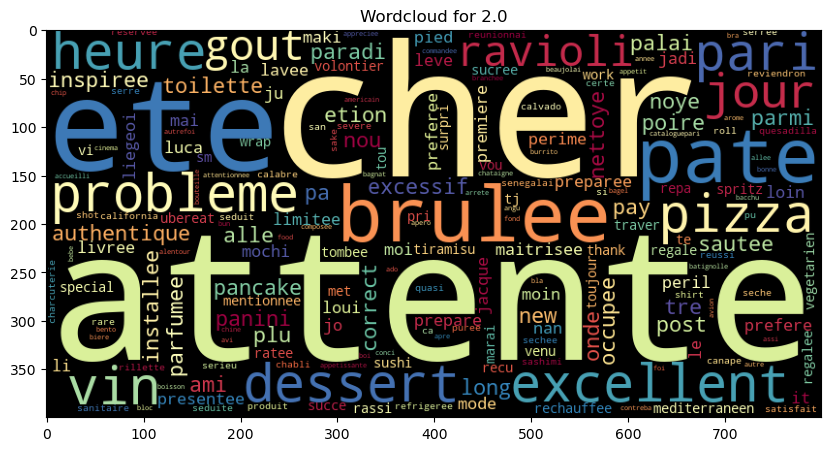

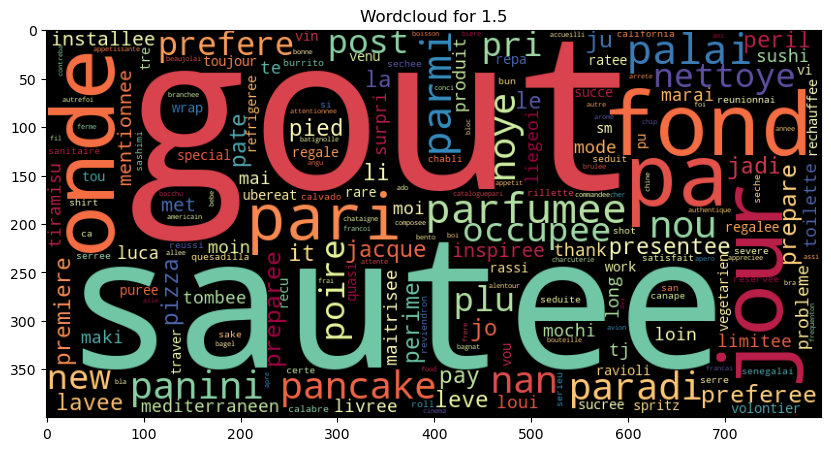

In [22]:
ratings_values=list(set(clean_data["average_note"].values.tolist()))
ratings_values.remove(0.0) #Valeurs pour le fillna => pas d'avis ni de notes
wordclouds_by_theme(clean_data,theme_col="average_note",theme_list=ratings_values,filepath="visuals/wordcloud/",savefig=False,with_title=True)

Wordcloud < 2>=> gout, long..\
Wordcloud 2.5 & 3 & 3.5 & 4=> long, cher, pizza, sushi \
Wordcloud 4.5 & 5=> Dessert,vin, excellent

Des thématiques générales se dégagent. Après, il faut bien comprendre, qu'il était question de note moyenne et non individuelle. Ainsi, les personnes ont des goûts différents donc n'apprécient pas nécessairement de la même façon un même restaurant. Ainsi, dans la partie sur l'analyse de sentiments, on se focusera uniquement sur les notes associées aux commentaires, et non la note globale du restaurant.

#### Localisation vs variables
Est-ce que l'emplacement d'un restaurant, que ce soit le quartier dans lequel il est implanté (proche d'endroits touristiques, quartiers de luxes, quartiers populaires) peut influencer sur sa notation?

In [23]:
map_plot_cat(data_with_cook_modalities_splitted,"latitude","longitude",10, "name", "average_note")


## Modélisation: Analyse de sentiments

La polarité est un concept utilisé en analyse de sentiments qui mesure l'attitude subjective d'un texte ou d'un commentaire. Il peut prendre différentes formes comme positive, négative ou neutre. La polarité d'un commentaire peut être calculée en utilisant des outils de traitement de la langue naturelle, comme des lexiques de mots ou des modèles de désentiment pré-entraînés. Dans notre cas, nous utilisons un modèle pré-entrainé issu du package TextBlob. 


#### Approche non supervisée

In [24]:
clean_data_for_sentiment= reviews_cleaner(clean_data)
polarity(clean_data_for_sentiment)

In [25]:
plot_sentiment_ratings(clean_data_for_sentiment)


On cherche à comprendre si le score de polarité représente bien la notation des utilisateurs. Si on voit que les scores de polarité représentent bien les avis, l'analyse de sentiments n'est pas utile. A contrario, si ce n'est pas le cas, la relation entre scores de polarité et notes est ambigu: 
- les notes ne sont peut être pas assez représentatives des commentaires: les avis utilisateurs possèdent bien plus d'informations/nuances que les notes ne permettent pas de différencier. Les échelles des personnes sont également différentes: une personne qui note 4 n'a pas les mêmes critères qu'une personne qui note 4 le même restaurant ! En ce sens, pour une même note, les scores de polarité peuvent être bien différents!

Ici, on voit que la majorité des notes ont des distributions de score de polarité centré en 0. Cela implique que les scores ne sont pas particulièrement discriminants pour expliquer les notes: les 1/2/3/4  ne sont pas forcément discernables, leurs scores étant plutôt similaire. Seuls les avis très positifs semblent être très bien retranscrits: on voit que les avis très positifs au sens du score de polarité se détache particulièrement du reste en ayant une distribution en 0.5.



Remarque:  les scores de polarité ont une limite: ils ne prennent pas spécifiquement le contexte en question. En effet, contrairement aux embeddings de type Doc2Vec, et aux algorithmes BERT, ils ne tiennent pas compte du contexte des termes..


Même on n'utilise pas les score de la polarité par la suite, on peut quand même s'en servir pour comprendre les termes employés dans les annonces très positives ou très négatives. Cela permet de comprendre comment le score de polarité se construit:

In [26]:
# Petit aperçu des pires commentaires au sens du score de polarité (le plus d'émotions négatives):
clean_data_for_sentiment.sort_values(by="polarity",ascending=True).head(20)

average_note                                           location  \
587           4.5                 11 rue Civiale, 75010 Paris France   
564           4.0  8 rue de l'Echelle 8 rue de l'Echelle Paris, 7...   
563           4.0       9 rue Camille Desmoulins, 75011 Paris France   
181           4.0           22 rue Juliette Dodu, 75010 Paris France   
19            4.5  153 Rue de Grenelle Metro: ligne 8 :La Tour Ma...   
252           4.5               46 Rue Lamartine, 75009 Paris France   
355           2.5    188 boulevard Saint Germain, 75007 Paris France   
18            4.5           14 rue de Monttessuy, 75007 Paris France   
677           4.5                  4 rue Lamarck, 75018 Paris France   
400           3.0           27 rue des Mathurins, 75008 Paris France   
633           3.5  12 rue de la Grande Truanderie, 75001 Paris Fr...   
256           4.5  23 Bis Avenue de la Motte Picquet, 75007 Paris...   
552           4.0         68 Boulevard de Clichy, 75018 Paris France   
669           4.5                41 Rue de Lille, 75007 Paris France   
550           4.0   48 rue Notre Dame de Lorette, 75009 Paris France   
291           3.5              206 rue de Rivoli, 75001 Paris France   
95            4.0          41 rue Saint Augustin, 75002 Paris France   
361           4.0          107 rue du Chevaleret, 75013 Paris France   
494           3.5   10 rue Jean Jacques Rousseau, 75001 Paris France   
768           3.5              70 rue de Turenne, 75003 Paris France   

                          name  number_reviews  ranking  \
587   Ravioli Chinois Nord Est             181     1570   
564                        Zen             621      927   
563               Café Du Coin              15     3146   
181              La Taquinerie              11     5184   
19         Ha Penny Bridge pub              70      617   
252         Les Marmites de Fa              66       29   
355                 Le Rouquet             100     3722   
18              Au Bon Accueil             996      399   
677  Sur la route de Plouescat             282      398   
400         Le Café du Théâtre              67     1135   
633                    Le Quid              21      130   
256            JEAN-PAUL HEVIN              21     3686   
552          Le Chat noir 1881            1067     2501   
669                Les Climats             871      484   
550          Magnà Street Food             100      514   
291                     Rivoli               7     5864   
95                   Le Pastel              50     3025   
361              Le Debonnaire             141      338   
494                  Aoi Sushi              20      715   
768           Comptoir Turenne              96     4204   

                                               reviews  \
587  [Maison mais pas bon:Nouveau restaurant, cuisi...   
564  [Cuisine digne d'une cantine:Michelin a-t-il g...   
563  [Décevant:Lieu sympa, mais personnel incompéte...   
181  [Bien content:J'étais bien content de trouver ...   
19   [Horrible:À FUIR ! \nGérantes odieuses\nServic...   
252  [Moyen:Accueil sympathique. Mais la qualité n’...   
355  [Horrible:Accueil deplorable. Rentabilité obli...   
18   [Une belle découverte:Au milieu d'une petite r...   
677  [La meilleure crêpe:Meilleure crêperie de la t...   
400  [Patronne horrible, méchante agressive:A évite...   
633  [Bien:Prix correct vu la qualité des plats. Ac...   
256  [chocolats et pâtisseries toujours aussi succu...   
552  [repas - souvenirs:restaurant mythique\ncarte ...   
669  [Cadre magnifique, cuisine originale:Déjeuner ...   
550  [La vraie pizza Napolitaine !:Les pizza sont e...   
291  [Quartier branché:Probablement mon coin préfér...   
95   [Toujours aussi bien ... Mais des passes droit...   
361  [Pas terrible:Ne correspond pas aux attentes m...   
494  [Simple et efficace:Carte abordable pour le qu...   
768  [Horrible:Sur le papier : Une salade avocat to...   

                                 

In [27]:
clean_data["average_note"]

0      4.0
1      5.0
2      4.0
3      4.5
4      4.0
      ... 
995    4.5
996    4.0
997    3.0
998    4.0
999    4.0
Name: average_note, Length: 1000, dtype: float64

(<Figure size 1000x800 with 1 Axes>,
 <AxesSubplot:title={'center':'Wordcloud of badest reviews'}>)

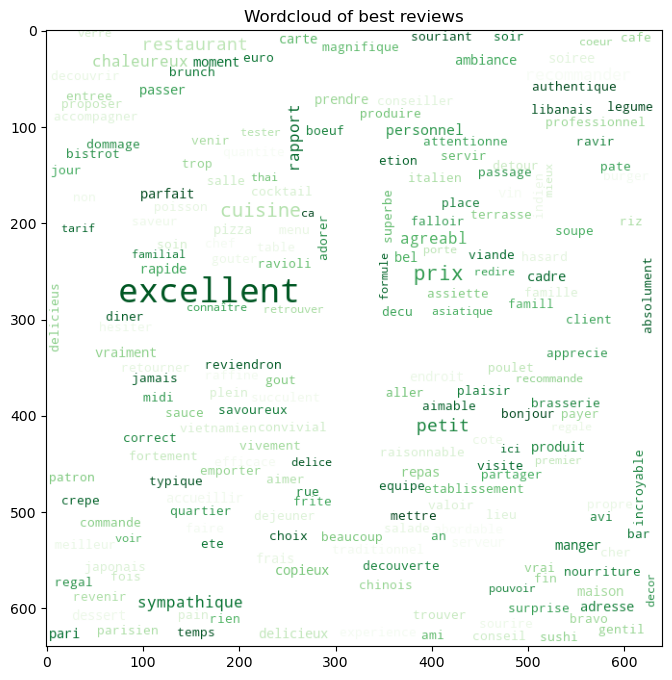

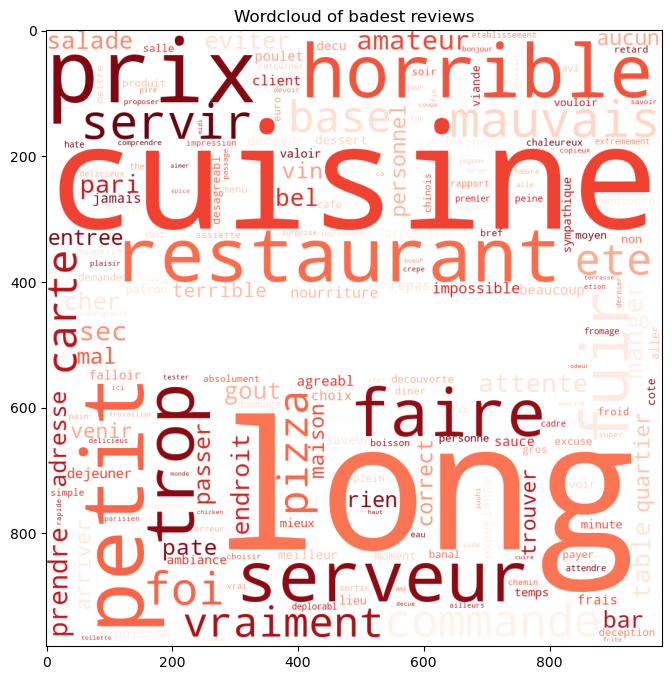

In [28]:
#### LES MOTS LES PLUS EMPLOYES POUR BON AVIS VS MAUVAIS
clean_data_for_sentiment["good_review"],clean_data_for_sentiment["bad_review"]=np.where(clean_data_for_sentiment["polarity"]>0.95,1,0), np.where(clean_data_for_sentiment["polarity"]<0,1,0)
positive_wc=generate_wordcloud(" ".join([value for value in clean_data_for_sentiment["clean_reviews"][clean_data_for_sentiment["good_review"]==1].values.tolist()]),colormap="Greens",background_image="pngtree-green-plus-sign-simple-logo-image_1082145.jpg")
plot_wordcloud(positive_wc,"Wordcloud of best reviews")
negative_wc=generate_wordcloud(" ".join([value for value in clean_data_for_sentiment["clean_reviews"][clean_data_for_sentiment["bad_review"]==1].values.tolist()]),colormap="Reds",background_image="minus-sign-icon-free-png.png")
plot_wordcloud(negative_wc,"Wordcloud of badest reviews")

Si on trouve le score de polarité pertinent pour estimer les sentiments évoqués dans un avis, (en fonction des ratings donnés) alors on peut directement exploiter cet élement par la suite. Ainsi, nous ferons un modèle de type Analyse de sentiments où les labels seront les ratings.

#### Approche supervisée

Désormais, on souhaite modéliser nos données de commentaires avec un modèle de classification supervisée. Il s'agit d'une approche plutôt pertinente dans notre cas puisqu'on veut distinguer les différentes émotions dans les commentaires. Dans un premier temps, on compose notre target, en créant des modalités pertinentes à prédire (cf sentiments_label).Après avoir fait cela, on execute la fonction prepare_for_ml qui récupère les features et split en train, test. L'option vectorizer permet de choisir la façon de vectoriser: doc2vec ou TFIDF.


Le Doc2Vec est un modèle d'apprentissage automatique non supervisé utilisé pour représenter des phrases ou des documents sous forme de vecteurs numériques. Il est basé sur le modèle de réseau de neurones de paragraphes (PV-DM) qui prend en compte le contexte des mots dans un document pour en déduire leur signification. Cela permet de conserver la sémantique et la signification des phrases dans les vecteurs générés.

Le TF-IDF, pour term frequency-inverse document frequency, est un outil statistique utilisé pour évaluer l'importance d'un mot dans un document par rapport à l'ensemble des documents d'un corpus. Il est calculé en fonction de la fréquence d'apparition d'un mot dans un document (terme fréquence) et de sa fréquence d'apparition dans l'ensemble des documents (inverse de la fréquence documentaire). Il permet de mettre en évidence les mots les plus importants d'un document.

La différence principale entre les deux est que le Doc2Vec permet de conserver la sémantique et la signification des phrases dans les vecteurs générés, tandis que le TF-IDF est utilisé pour évaluer l'importance des mots dans un document par rapport à l'ensemble des documents d'un corpus. Le Doc2Vec est utilisé pour représenter des phrases ou des documents sous forme de vecteurs numériques, tandis que le TF-IDF est utilisé pour extraire les termes les plus pertinents d'un document.






In [29]:
def sentiments_label(value):
    if value == "1.0" or value == "2.0":
        value = "bad"
    elif value == "3.0" or value == "4.0":
        value = "average"
    elif value == "5.0":
        value = "excellent"
    else:
        value ="no_review"
    return value
    

Par la suite, on tentera une modélisation avec chacun des vectoriseurs

#### Les modèles

La fonction "train_and_evaluate_models" entraîne et évalue plusieurs modèles sur les données fournies (X_train, X_test, y_train et y_test). Les modèles utilisés sont "KNN", "SVM", "Arbre de décision" et "Forêt aléatoire". Pour chaque modèle, la fonction fit les données d'entraînement et prédit les données de test. L'accuracy et la matrice de confusion pour chaque modèle sont enregistrés dans un dictionnaire.

Les modèles choisis sont des algorithmes couramment utilisés dans les analyses de sentiments et représentent différentes approches de classification. KNN (k-neighbors) est un algorithme de classification basé sur les voisins, SVM (Support Vector Machine) est un algorithme de classification basé sur les vecteurs de support, Decision Tree est un algorithme de classification basé sur des arbres de décision et Random Forest est une version améliorée de Decision Tree qui utilise plusieurs arbres de décision pour classer les données.





In [32]:
import pickle
tf=TfidfVectorizer()
tf.fit(clean_data_for_sentiment)
pickle.dump( tf, open( "artefacts/tfidf.pkl", "wb" ))


In [33]:
X_train, X_test, y_train, y_test=prepare_for_ml(clean_data_for_sentiment,vectorizer="tfidf")


In [34]:
results=train_and_evaluate_models(X_train, X_test, y_train, y_test)

In [ ]:
plot_model_performance(results)

In [ ]:
import pickle
pickle.dump( results, open( "artefacts/results_tfidf.pkl", "wb" ))

In [ ]:
y_train

array([2, 3, 1, ..., 0, 0, 2])

In [ ]:
X_train, X_test, y_train, y_test=prepare_for_ml(clean_data_for_sentiment,vectorizer="doc2vec")
results=train_and_evaluate_models(X_train, X_test, y_train, y_test)

In [ ]:
from scripts.viz.graph import plot_model_performance
plot_model_performance(results)

On exporte en pickle pour l'appli

In [31]:
import pickle
pickle.dump( tf, open( "artefacts/results_doc2vec.pkl", "wb" ))


NameError: name 'tf' is not defined

Le modèle semble être meilleur sur TFIDF donc on va garder cette méthode de vectorisation. Parmi les différents modèles, nous allons garder le SVM puisqu'il donne les meilleurs résultats en termes d'accuracy. Maintenant qu'on a un modèle prédictif, on va stocker les prédictions:

In [33]:
from sklearn.svm import SVC
#from scripts.ml.model import predict
model_svm=SVC()
model_svm.fit(X_train,y_train)
model_tfidf=tf
#predict(model_svm,vectorizer,clean_data) # A modifier selon les besoins

SVC()

In [34]:
import pickle
pickle.dump( model_svm, open( "artefacts/svm.pkl", "wb" ))